# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:green"> Matteucci Massimiliano 932234 </span>
## <span style="color:green"> Esercitazione 11 </span>
## <span style="color:green"> Esercizio 1 </span>

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

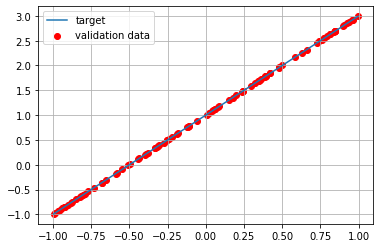

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
print(x_train.size, y_train.size)

Epoch 1/30
16/16 [==============================] - 1s 12ms/step - loss: 1.1883 - mse: 1.1883 - val_loss: 0.9615 - val_mse: 0.9615
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7449 - mse: 0.7449 - val_loss: 0.6267 - val_mse: 0.6267
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4914 - mse: 0.4914 - val_loss: 0.4272 - val_mse: 0.4272
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3394 - mse: 0.3394 - val_loss: 0.3030 - val_mse: 0.3030
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2436 - mse: 0.2436 - val_loss: 0.2222 - val_mse: 0.2222
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1806 - mse: 0.1806 - val_loss: 0.1672 - val_mse: 0.1672
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1372 - mse: 0.1372 - val_loss: 0.1283 - val_mse: 0.1283
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1060 - mse: 0.1

In [6]:
model.get_weights()

[array([[1.9543936]], dtype=float32), array([0.9995963], dtype=float32)]

In [7]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 7.5535e-04 - mse: 7.5535e-04

Test loss: 0.0007553526666015387
Test accuracy: 0.0007553526666015387


In [8]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 7.5535e-04 - mse: 7.5535e-04

Test loss: 0.0007553526666015387
Test accuracy: 0.0007553526666015387


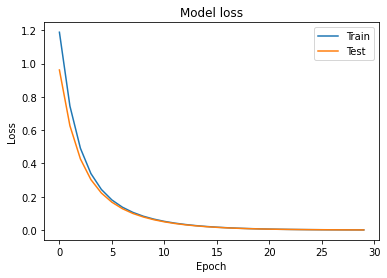

In [9]:

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

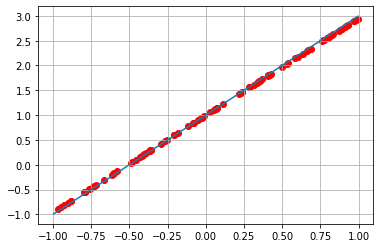

In [10]:
model.get_weights()
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

## <span style="color:green"> Esercizio 1 </span>

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

Aumentiamo il numero di epoche

In [11]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
print(x_train.size, y_train.size)

Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 0.7814 - mse: 0.7814 - val_loss: 0.5557 - val_mse: 0.5557
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4175 - mse: 0.4175 - val_loss: 0.2999 - val_mse: 0.2999
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2253 - mse: 0.2253 - val_loss: 0.1639 - val_mse: 0.1639
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233 - val_loss: 0.0913 - val_mse: 0.0913
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0521 - val_mse: 0.0521
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0145 - mse: 0.01

In [12]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 6.2225e-07 - mse: 6.2225e-07

Test loss: 6.222468869054865e-07
Test accuracy: 6.222468869054865e-07


In [13]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 6.2225e-07 - mse: 6.2225e-07

Test loss: 6.222468869054865e-07
Test accuracy: 6.222468869054865e-07


In [14]:
model.get_weights()

[array([[1.9986911]], dtype=float32), array([0.9999874], dtype=float32)]

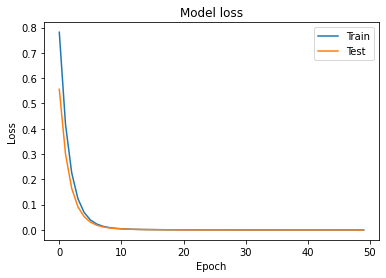

In [15]:

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Aumentando il numero di epoche dal grafico della loss non osserviamo cambiamenti significativi, infatti dalle 20 epoche in poi il grafico rimane costante.

Aumento il numero dei dati di training

In [16]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
x_train = np.random.uniform(-1, 1, 1500)
y_train = np.random.normal(m * x_train + b, sigma)
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
print(x_train.size, y_train.size)

Epoch 1/30
47/47 [==============================] - 0s 4ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 0.5552 - val_mse: 0.5552
Epoch 2/30
47/47 [==============================] - 0s 1ms/step - loss: 0.3479 - mse: 0.3479 - val_loss: 0.2337 - val_mse: 0.2337
Epoch 3/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1567 - mse: 0.1567 - val_loss: 0.1147 - val_mse: 0.1147
Epoch 4/30
47/47 [==============================] - 0s 1ms/step - loss: 0.0788 - mse: 0.0788 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 5/30
47/47 [==============================] - 0s 1ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 6/30
47/47 [==============================] - 0s 1ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 7/30
47/47 [==============================] - 0s 1ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 8/30
47/47 [==============================] - 0s 1ms/step - loss: 0.0060 - mse: 0.00

In [17]:

model.get_weights()

[array([[1.9998972]], dtype=float32), array([1.000002], dtype=float32)]

In [18]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 3.8299e-09 - mse: 3.8299e-09

Test loss: 3.829895955931306e-09
Test accuracy: 3.829895955931306e-09


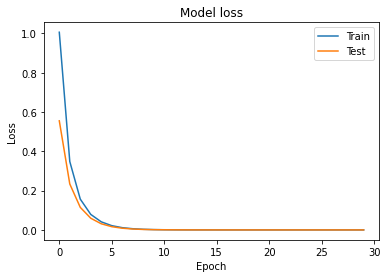

In [19]:

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Aumentando il numero di valori di training osserviamo come le loss del train e del test diminuiscono più velocemente nel corso delle epoche, con un miglioramento della precisione del test e delle variabili della retta.

Adesso introduciamo il rumore nelle misure

In [20]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# generate training inputs
x_train = np.random.uniform(-1, 1, 500)

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

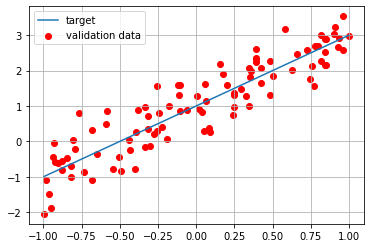

In [21]:
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
print(x_train.size, y_train.size)

Epoch 1/30
16/16 [==============================] - 0s 10ms/step - loss: 3.7845 - mse: 3.7845 - val_loss: 3.6756 - val_mse: 3.6756
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 2.9038 - mse: 2.9038 - val_loss: 2.8753 - val_mse: 2.8753
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 2.2880 - mse: 2.2880 - val_loss: 2.3073 - val_mse: 2.3073
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 1.8474 - mse: 1.8474 - val_loss: 1.8802 - val_mse: 1.8802
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 1.5132 - mse: 1.5132 - val_loss: 1.5578 - val_mse: 1.5578
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 1.2600 - mse: 1.2600 - val_loss: 1.3087 - val_mse: 1.3087
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 1.0631 - mse: 1.0631 - val_loss: 1.1106 - val_mse: 1.1106
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.9055 - mse: 0.9

In [23]:
model.get_weights()

[array([[1.8324175]], dtype=float32), array([1.0147583], dtype=float32)]

In [24]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.2844 - mse: 0.2844

Test loss: 0.2843763530254364
Test accuracy: 0.2843763530254364


In [25]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mse: 0.0103

Test loss: 0.010346764698624611
Test accuracy: 0.010346764698624611


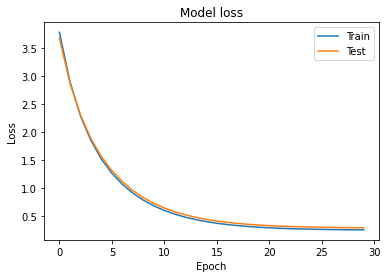

In [26]:

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

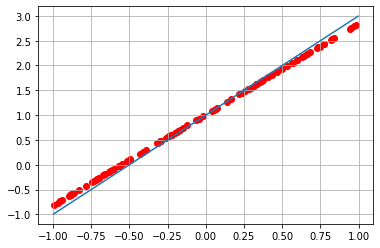

In [27]:
model.get_weights()
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()


Introducendo il rumore osserviamo un netto peggioramento della precisione del modello sulle singole misure mentre per la precisione sulla funzione target non si riscontrano grandi cambiamenti.

Mantenendo lo stesso rumore andiamo adesso ad aumentare il numero di punti di  training

In [28]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# generate training inputs
x_train = np.random.uniform(-1, 1, 2500)

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [29]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
print(x_train.size, y_train.size)

Epoch 1/30
79/79 [==============================] - 0s 3ms/step - loss: 1.4321 - mse: 1.4321 - val_loss: 0.8685 - val_mse: 0.8685
Epoch 2/30
79/79 [==============================] - 0s 1ms/step - loss: 0.5668 - mse: 0.5668 - val_loss: 0.4491 - val_mse: 0.4491
Epoch 3/30
79/79 [==============================] - 0s 1ms/step - loss: 0.3503 - mse: 0.3503 - val_loss: 0.3114 - val_mse: 0.3114
Epoch 4/30
79/79 [==============================] - 0s 1ms/step - loss: 0.2768 - mse: 0.2768 - val_loss: 0.2628 - val_mse: 0.2628
Epoch 5/30
79/79 [==============================] - 0s 1ms/step - loss: 0.2522 - mse: 0.2522 - val_loss: 0.2457 - val_mse: 0.2457
Epoch 6/30
79/79 [==============================] - 0s 2ms/step - loss: 0.2439 - mse: 0.2439 - val_loss: 0.2389 - val_mse: 0.2389
Epoch 7/30
79/79 [==============================] - 0s 1ms/step - loss: 0.2405 - mse: 0.2405 - val_loss: 0.2357 - val_mse: 0.2357
Epoch 8/30
79/79 [==============================] - 0s 1ms/step - loss: 0.2394 - mse: 0.23

In [30]:
model.get_weights()

[array([[2.0030966]], dtype=float32), array([0.97214735], dtype=float32)]

In [31]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.2341 - mse: 0.2341

Test loss: 0.23414750397205353
Test accuracy: 0.23414750397205353


In [32]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 7.7710e-04 - mse: 7.7710e-04

Test loss: 0.0007771008531562984
Test accuracy: 0.0007771008531562984


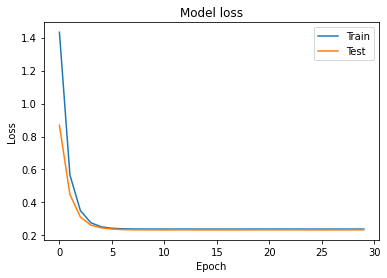

In [33]:

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

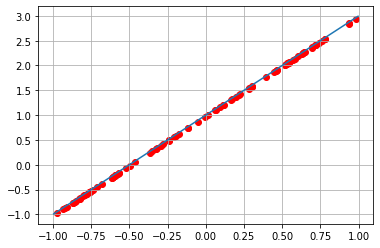

In [34]:
model.get_weights()
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Nonostante l'aumentare di punti di training osserviamo come il la rete costituita da un solo neurone non riesce ad adattarsi bene al rumore difatti le loss sono molto maggiori rispetto ai casi senza.

## <span style="color:green"> Esercizio 2 </span>

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In [35]:
import numpy as np

a=3
b=-2
c=-3
d=4
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = a * x_valid**3 + b* x_valid**2+c*x_valid+d# ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train**3 + b* x_train**2+c*x_train+d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a * x_valid**3 + b* x_valid**2+c*x_valid+d, sigma)


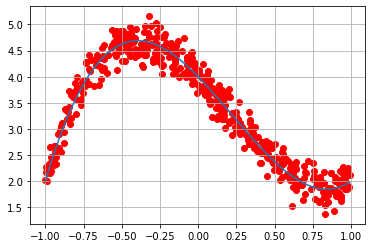

In [36]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
# plt.legend()
plt.grid(True)
plt.show()

In [130]:
def Grafici(model):
  y_predicted = model.predict(x_predicted)
  y_predicted1 = model.predict(x_predicted1)
  y_predicted2 = model.predict(x_predicted2)
  plt.scatter(x_predicted1, y_predicted1,color='y')
  plt.scatter(x_predicted2, y_predicted2,color='y')
  plt.scatter(x_predicted, y_predicted,color='r')
  plt.plot(x_valid, y_target)
  plt.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
x_predicted1 = np.random.uniform(-1.3, -1, 50)
x_predicted2 = np.random.uniform(1, 1.3, 50)
x_valid = np.random.uniform(-1.3,1.3,500)
x_valid.sort()
y_target = a * x_valid**3 + b* x_valid**2+c*x_valid+d





In [132]:
# compose the NN model


model = tf.keras.Sequential()
model.add(Dense(4,activation='elu', input_shape=(1,)))
model.add(Dense(4,activation='elu'))
model.add(Dense(1))



# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [133]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,batch_size=32, 
          epochs=50, 
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid,y_valid))

Epoch 1/50
63/63 [==============================] - 0s 3ms/step - loss: 2.8354 - mse: 2.8354 - val_loss: 0.7098 - val_mse: 0.7098
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5019 - mse: 0.5019 - val_loss: 0.3825 - val_mse: 0.3825
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3331 - mse: 0.3331 - val_loss: 0.3665 - val_mse: 0.3665
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2996 - mse: 0.2996 - val_loss: 0.3141 - val_mse: 0.3141
Epoch 5/50
63/63 [==============================] - 0s 1ms/step - loss: 0.2690 - mse: 0.2690 - val_loss: 0.3230 - val_mse: 0.3230
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2396 - mse: 0.2396 - val_loss: 0.3140 - val_mse: 0.3140
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2124 - mse: 0.2124 - val_loss: 0.2787 - val_mse: 0.2787
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1870 - mse: 0.18

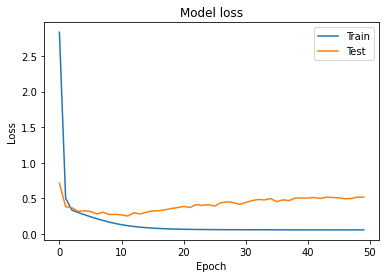

In [134]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

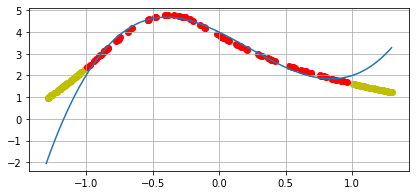

In [135]:

Grafici(model)
plt.show()

In [158]:
# compose the NN model


model1 = tf.keras.Sequential()
model1.add(Dense(4,activation='elu', input_shape=(1,)))
model1.add(Dense(8,activation='elu'))
model1.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [159]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history1 = model1.fit(x=x_train, y=y_train,batch_size=32, 
          epochs=50, 
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid,y_valid))

Epoch 1/50
63/63 [==============================] - 1s 4ms/step - loss: 1.7596 - mse: 1.7596 - val_loss: 0.7113 - val_mse: 0.7113
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6203 - mse: 0.6203 - val_loss: 0.7170 - val_mse: 0.7170
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6096 - mse: 0.6096 - val_loss: 0.6855 - val_mse: 0.6855
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6038 - mse: 0.6038 - val_loss: 0.6844 - val_mse: 0.6844
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.6808 - val_mse: 0.6808
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.6677 - val_mse: 0.6677
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5826 - mse: 0.5826 - val_loss: 0.6510 - val_mse: 0.6510
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.57

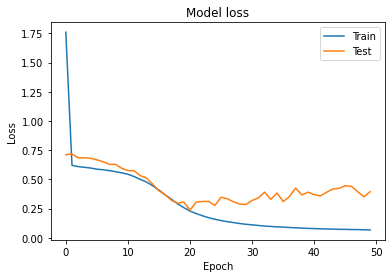

In [160]:
# look into training history
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

[]

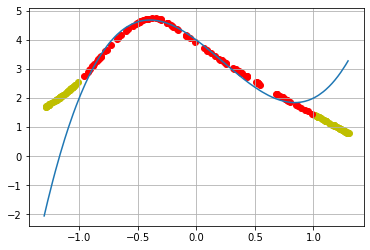

In [161]:
Grafici(model1)
plt.plot()

In [175]:
# compose the NN model

model2 = tf.keras.Sequential()
model2.add(Dense(4,activation='elu', input_shape=(1,)))
model2.add(Dense(4,activation='elu'))
model2.add(Dense(4,activation='elu'))
model2.add(Dense(4,activation='elu'))
model2.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [176]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2 = model2.fit(x=x_train, y=y_train,batch_size=32, 
          epochs=50, 
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid,y_valid))

Epoch 1/50
63/63 [==============================] - 1s 4ms/step - loss: 1.5149 - mse: 1.5149 - val_loss: 0.4614 - val_mse: 0.4614
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4253 - mse: 0.4253 - val_loss: 0.4794 - val_mse: 0.4794
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4104 - mse: 0.4104 - val_loss: 0.4813 - val_mse: 0.4813
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4014 - mse: 0.4014 - val_loss: 0.4670 - val_mse: 0.4670
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3939 - mse: 0.3939 - val_loss: 0.4750 - val_mse: 0.4750
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 0.4487 - val_mse: 0.4487
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3732 - mse: 0.3732 - val_loss: 0.4262 - val_mse: 0.4262
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3423 - mse: 0.34

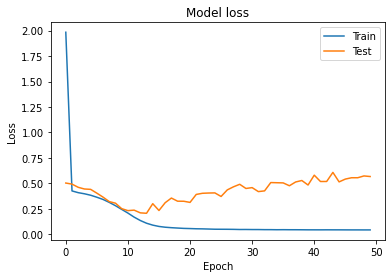

In [173]:
# look into training history
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

[]

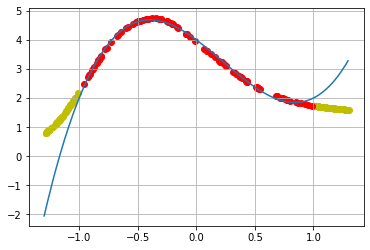

In [174]:
Grafici(model2)
plt.plot()

In [185]:
# compose the NN model

model3 = tf.keras.Sequential()
model3.add(Dense(4,activation='relu', input_shape=(1,)))
model3.add(Dense(4,activation='relu'))
model3.add(Dense(4,activation='relu'))
model3.add(Dense(4,activation='relu'))
model3.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [186]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history3 = model3.fit(x=x_train, y=y_train,batch_size=32, 
          epochs=50, 
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid,y_valid))

Epoch 1/50
63/63 [==============================] - 1s 3ms/step - loss: 4.4806 - mse: 4.4806 - val_loss: 1.0994 - val_mse: 1.0994
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.9815 - mse: 0.9815 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.7331 - mse: 0.7331 - val_loss: 0.5764 - val_mse: 0.5764
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5175 - mse: 0.5175 - val_loss: 0.4410 - val_mse: 0.4410
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3832 - mse: 0.3832 - val_loss: 0.3269 - val_mse: 0.3269
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2630 - mse: 0.2630 - val_loss: 0.2645 - val_mse: 0.2645
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1958 - mse: 0.1958 - val_loss: 0.2100 - val_mse: 0.2100
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.15

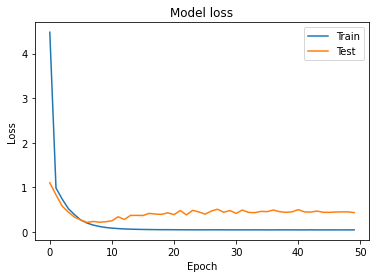

In [187]:
# look into training history
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

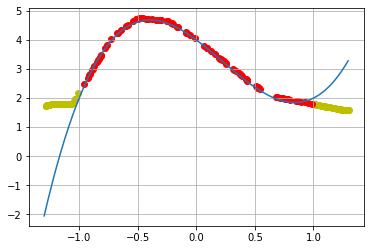

In [188]:
Grafici(model3)
plt.show()

In [221]:
# compose the NN model

model4 = tf.keras.Sequential()
model4.add(Dense(4,activation='exponential', input_shape=(1,)))
model4.add(Dense(4,activation='exponential'))
model4.add(Dense(4,activation='exponential'))
model4.add(Dense(4,activation='exponential'))
model4.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [222]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history4 = model4.fit(x=x_train, y=y_train,batch_size=32, 
          epochs=50, 
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid,y_valid))

Epoch 1/50
63/63 [==============================] - 1s 4ms/step - loss: 1.4912 - mse: 1.4912 - val_loss: 0.8811 - val_mse: 0.8811
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6855 - mse: 0.6855 - val_loss: 0.9517 - val_mse: 0.9517
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6350 - mse: 0.6350 - val_loss: 0.8108 - val_mse: 0.8108
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5490 - mse: 0.5490 - val_loss: 0.4838 - val_mse: 0.4838
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4756 - mse: 0.4756 - val_loss: 0.3978 - val_mse: 0.3978
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3638 - mse: 0.3638 - val_loss: 0.2976 - val_mse: 0.2976
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3499 - mse: 0.3499 - val_loss: 0.3664 - val_mse: 0.3664
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2941 - mse: 0.29

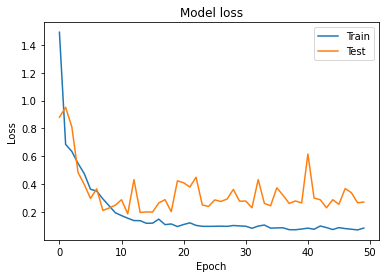

In [223]:
# look into training history
# Plot training & validation loss values
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

[]

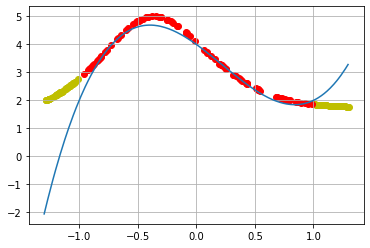

In [224]:
Grafici(model4)
plt.plot()

In [209]:
# compose the NN model

model5 = tf.keras.Sequential()
model5.add(Dense(4,activation='elu', input_shape=(1,)))
model5.add(Dense(4,activation='elu'))
model5.add(Dense(4,activation='elu'))
model5.add(Dense(4,activation='elu'))
model5.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects
model5.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [210]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history5 = model5.fit(x=x_train, y=y_train,batch_size=32, 
          epochs=50, 
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid,y_valid))

Epoch 1/50
63/63 [==============================] - 1s 4ms/step - loss: 10.4637 - mse: 10.4637 - val_loss: 9.1294 - val_mse: 9.1294
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 7.3725 - mse: 7.3725 - val_loss: 5.8942 - val_mse: 5.8942
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 4.4074 - mse: 4.4074 - val_loss: 3.2661 - val_mse: 3.2661
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 2.3344 - mse: 2.3344 - val_loss: 1.6853 - val_mse: 1.6853
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 1.2158 - mse: 1.2158 - val_loss: 0.8911 - val_mse: 0.8911
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6748 - mse: 0.6748 - val_loss: 0.6737 - val_mse: 0.6737
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4845 - mse: 0.4845 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4374 - mse: 0.

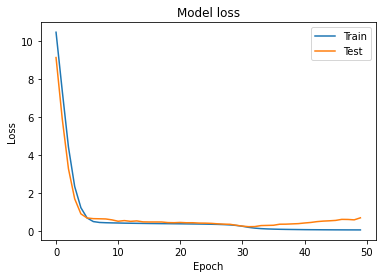

In [211]:
# look into training history
# Plot training & validation loss values
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

[]

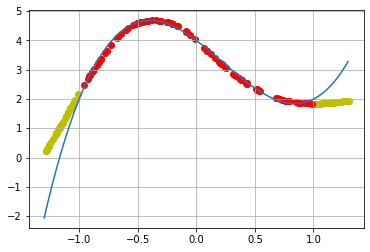

In [212]:
Grafici(model5)
plt.plot()

In [248]:
# compose the NN model

model6 = tf.keras.Sequential()
model6.add(Dense(4,activation='elu', input_shape=(1,)))
model6.add(Dense(4,activation='elu'))
model6.add(Dense(4,activation='elu'))
model6.add(Dense(4,activation='elu'))
model6.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects
model6.compile(optimizer='sgd', loss='mean_absolute_percentage_error', metrics=['mean_absolute_percentage_error'])

In [249]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history6 = model6.fit(x=x_train, y=y_train,batch_size=32, 
          epochs=50, 
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid,y_valid))

Epoch 1/50
63/63 [==============================] - 1s 4ms/step - loss: 29.5784 - mean_absolute_percentage_error: 29.5784 - val_loss: 16.5297 - val_mean_absolute_percentage_error: 16.5297
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 16.1353 - mean_absolute_percentage_error: 16.1353 - val_loss: 17.2527 - val_mean_absolute_percentage_error: 17.2527
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 15.3075 - mean_absolute_percentage_error: 15.3075 - val_loss: 14.3083 - val_mean_absolute_percentage_error: 14.3083
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 15.0330 - mean_absolute_percentage_error: 15.0330 - val_loss: 14.9439 - val_mean_absolute_percentage_error: 14.9439
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 14.2798 - mean_absolute_percentage_error: 14.2798 - val_loss: 13.0298 - val_mean_absolute_percentage_error: 13.0298
Epoch 6/50
63/63 [==============================] - 0s 2ms/s

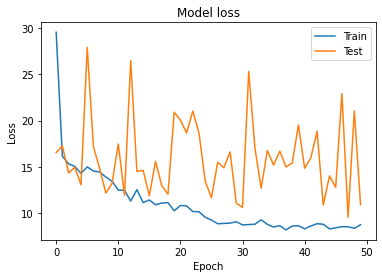

In [250]:
# look into training history
# Plot training & validation loss values
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

[]

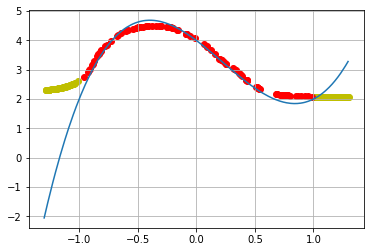

In [251]:
Grafici(model6)
plt.plot()

Dalle diverse reti neurali sopra esposte vediamo come in linea generale all'aumentare del numero di nodi e della dimensione degli stessi si hanno approssimazioni migliori della funzione in esame.
Osserviamo anche che le reti neurali approssimano bene la funzione nell'intervallo di training (punti in rosso) mentre uscendo al di fuori di esso non si ha alcuna correlazione tra i punti proposti (in giallo) e quelli effettivamente della funzione.   

## <span style="color:green"> Esercizio 3 </span>
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [259]:

n_train = 5000
n_valid = 500
# generate synthetic training dataset
x_train = np.random.uniform(-1.5, 1.5, (n_train, 2))
y_train = np.zeros(n_train)
# generate synthetic validation data
x_valid = np.random.uniform(-1.5, 1.5, (n_valid, 2))
y_valid = np.zeros((n_valid))


for i in range(n_train):
  y_train[i]= np.sin(x_train[i,0]**2 + x_train[i,1]**2)

for i in range(n_valid):
  y_valid[i]= np.sin(x_valid[i,0]**2 + x_valid[i,1]**2)

In [280]:

#from tensorflow.keras.callbaks import EarlyStopping

model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,)))
model.add(Dense(8, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(8, activation='elu'))


model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [281]:

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

bsize = 32
# fit the model using training dataset
# over 50 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=bsize, epochs=300, callbacks= [callback], 
          validation_data=(x_valid, y_valid))

Epoch 1/300
157/157 [==============================] - 1s 2ms/step - loss: 0.1685 - mse: 0.1685 - val_loss: 0.1414 - val_mse: 0.1414
Epoch 2/300
157/157 [==============================] - 0s 1ms/step - loss: 0.1427 - mse: 0.1427 - val_loss: 0.1420 - val_mse: 0.1420
Epoch 3/300
157/157 [==============================] - 0s 1ms/step - loss: 0.1418 - mse: 0.1418 - val_loss: 0.1397 - val_mse: 0.1397
Epoch 4/300
157/157 [==============================] - 0s 1ms/step - loss: 0.1415 - mse: 0.1415 - val_loss: 0.1395 - val_mse: 0.1395
Epoch 5/300
157/157 [==============================] - 0s 1ms/step - loss: 0.1410 - mse: 0.1410 - val_loss: 0.1393 - val_mse: 0.1393
Epoch 6/300
157/157 [==============================] - 0s 1ms/step - loss: 0.1407 - mse: 0.1407 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 7/300
157/157 [==============================] - 0s 1ms/step - loss: 0.1405 - mse: 0.1405 - val_loss: 0.1382 - val_mse: 0.1382
Epoch 8/300
157/157 [==============================] - 0s 2ms/step - 

In [282]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025

Test loss: 0.00248598656617105
Test accuracy: 0.00248598656617105


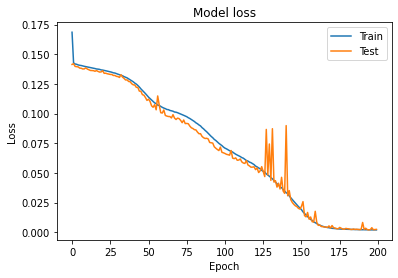

In [283]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

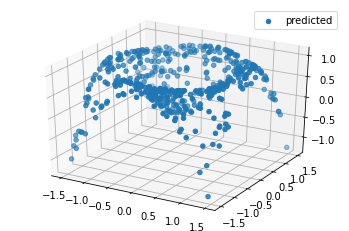

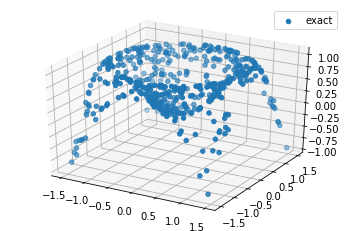

In [284]:

x_predicted = np.random.uniform(-1.5, 1.5, (n_valid, 2))
y_predicted = model.predict(x_predicted)
y_target = np.zeros(n_valid)
for i in range(n_valid):
  y_target[i]= np.sin(x_predicted[i,0]**2 + x_predicted[i,1]**2)


ax1 = plt.axes(projection='3d')
ax1.scatter3D(x_predicted[:,0], x_predicted[:,1], y_predicted, label='predicted')
plt.grid(True)
plt.legend()
plt.show()

ax2 = plt.axes(projection='3d')
ax2.scatter3D(x_predicted[:,0], x_predicted[:,1], y_target, label = 'exact')

plt.grid(True)
plt.legend()
plt.show()